<a href="https://colab.research.google.com/github/madhan2707/ML-with-flask/blob/main/INSURANCE_CLAIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
import pandas as pd

insurance=pd.read_csv('/content/drive/MyDrive/ML-AD/Claimants_Data.csv')

In [ ]:
insurance

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,100152,0,1.0,1.0,1.0,88,4998.43,Severe,10673.92,1,8921.29,Comprehensive,Minor Offenses
100152,100153,0,1.0,1.0,1.0,89,9925.55,Moderate,6345.22,1,18418.60,Third-Party,Clean
100153,100154,1,0.0,1.0,1.0,4,8314.99,Severe,9233.50,1,10453.20,Third-Party,Major Offenses
100154,100155,0,0.0,0.0,0.0,50,3302.68,Moderate,1489.38,1,1825.65,Third-Party,Minor Offenses


In [ ]:
insurance.isnull()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,False,False,False,False,False,False,False,False,False,False,False,False,False
100152,False,False,False,False,False,False,False,False,False,False,False,False,False
100153,False,False,False,False,False,False,False,False,False,False,False,False,False
100154,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
insurance.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
insurance.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


In [ ]:
insurance.drop(['CASENUM'],axis=1,inplace=True)

In [ ]:
insurance

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses
...,...,...,...,...,...,...,...,...,...,...,...,...
100151,0,1.0,1.0,1.0,88,4998.43,Severe,10673.92,1,8921.29,Comprehensive,Minor Offenses
100152,0,1.0,1.0,1.0,89,9925.55,Moderate,6345.22,1,18418.60,Third-Party,Clean
100153,1,0.0,1.0,1.0,4,8314.99,Severe,9233.50,1,10453.20,Third-Party,Major Offenses
100154,0,0.0,0.0,0.0,50,3302.68,Moderate,1489.38,1,1825.65,Third-Party,Minor Offenses


In [ ]:
Q2=np.percentile(insurance.CLMAGE,[25])[0]
Q3=np.percentile(insurance.CLMAGE,[50])[0]
Q4=np.percentile(insurance.CLMAGE,[75])[0]

IQR=Q3-Q2
IQR==Q4-Q3

np.True_

In [ ]:
lower_bound=Q2-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

outliers=[x for x in insurance.CLMAGE if x<lower_bound or x>upper_bound]

print(f"Q1 (25 percentile): {Q2}")
print(f"Q2 (50 percentile): {Q3}")
print(f"Q3 (75 percentile): {Q4}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

Q1 (25 percentile): 23.0
Q2 (50 percentile): 47.0
Q3 (75 percentile): 71.0
IQR: 24.0
Lower Bound: -13.0
Upper Bound: 83.0
Outliers: [85, 89, 85, 92, 85, 87, 94, 85, 85, 84, 84, 92, 88, 88, 93, 92, 94, 87, 93, 84, 92, 90, 88, 93, 85, 84, 84, 92, 85, 90, 92, 87, 84, 85, 92, 89, 94, 89, 89, 90, 86, 91, 85, 94, 91, 94, 85, 84, 89, 92, 87, 88, 92, 89, 86, 88, 86, 85, 85, 87, 89, 90, 89, 88, 90, 93, 94, 87, 89, 88, 94, 84, 93, 85, 93, 84, 94, 87, 93, 94, 90, 87, 87, 86, 93, 87, 84, 94, 94, 93, 84, 86, 94, 91, 88, 87, 90, 90, 85, 91, 87, 84, 89, 85, 92, 86, 84, 87, 85, 91, 94, 93, 94, 89, 89, 93, 86, 87, 86, 94, 94, 89, 84, 90, 85, 88, 91, 84, 93, 86, 86, 87, 89, 91, 84, 94, 89, 86, 88, 87, 86, 92, 93, 92, 85, 91, 88, 93, 88, 85, 84, 90, 92, 93, 92, 92, 93, 86, 93, 86, 94, 93, 84, 91, 87, 88, 86, 88, 84, 87, 85, 94, 92, 91, 94, 89, 87, 89, 93, 85, 91, 89, 84, 86, 90, 84, 86, 94, 92, 84, 86, 86, 92, 87, 84, 88, 86, 91, 84, 88, 88, 88, 85, 88, 91, 86, 88, 92, 87, 89, 84, 87, 89, 84, 94, 92, 85,

<ipython-input-12-3c644cf525c3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance.CLMAGE)


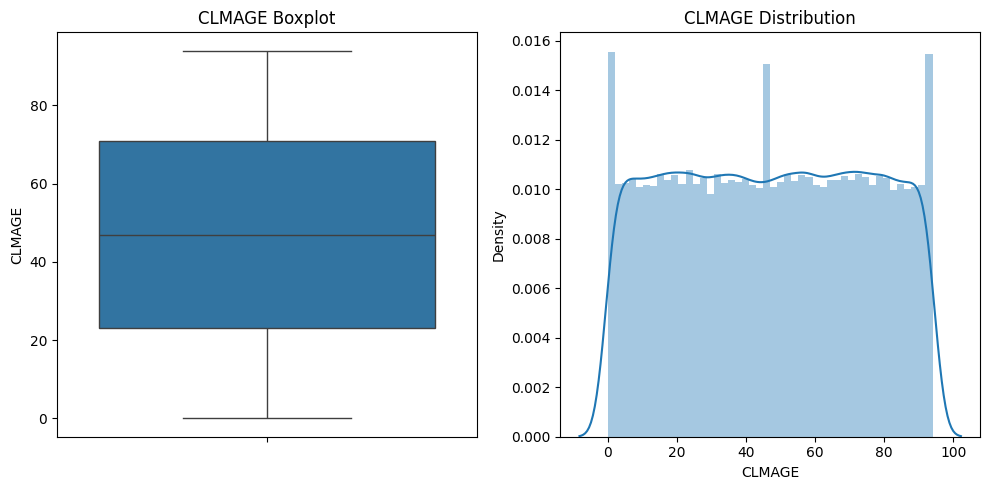

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(insurance.CLMAGE)
plt.title('CLMAGE Boxplot')


plt.subplot(1,2,2)
sns.distplot(insurance.CLMAGE)
plt.title('CLMAGE Distribution')

plt.tight_layout()
plt.show()

In [ ]:
insurance.drop_duplicates(['CLMAGE'],inplace=True)

In [ ]:
label_encoder=LabelEncoder()
insurance['Policy_Type']=label_encoder.fit_transform(insurance['Policy_Type'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS Accident_Severity  \
0           1     1.0       1.0       0.0       0   8502.60          Moderate   
1           0     1.0       0.0       1.0      19   2464.30          Moderate   
2           1     0.0       0.0       1.0      69  15647.05            Severe   
3           1     0.0       0.0       1.0      34   9309.79          Moderate   
4           1     1.0       1.0       0.0       2    663.94            Severe   
..        ...     ...       ...       ...     ...       ...               ...   
326         1     0.0       1.0       1.0      35   9517.24             Minor   
358         1     1.0       0.0       1.0      26  15048.62            Severe   
365         0     1.0       0.0       1.0      86   8754.95          Moderate   
367         1     0.0       0.0       0.0      91   8391.29          Moderate   
594         0     0.0       0.0       1.0      77  13974.98             

In [ ]:
label_encoder=LabelEncoder()
insurance['Accident_Severity']=label_encoder.fit_transform(insurance['Accident_Severity'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0   8502.60   
1           0     1.0       0.0       1.0      19   2464.30   
2           1     0.0       0.0       1.0      69  15647.05   
3           1     0.0       0.0       1.0      34   9309.79   
4           1     1.0       1.0       0.0       2    663.94   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35   9517.24   
358         1     1.0       0.0       1.0      26  15048.62   
365         0     1.0       0.0       1.0      86   8754.95   
367         1     0.0       0.0       0.0      91   8391.29   
594         0     0.0       0.0       1.0      77  13974.98   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17              

In [ ]:
label_encoder=LabelEncoder()
insurance['Driving_Record']=label_encoder.fit_transform(insurance['Driving_Record'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0   8502.60   
1           0     1.0       0.0       1.0      19   2464.30   
2           1     0.0       0.0       1.0      69  15647.05   
3           1     0.0       0.0       1.0      34   9309.79   
4           1     1.0       1.0       0.0       2    663.94   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35   9517.24   
358         1     1.0       0.0       1.0      26  15048.62   
365         0     1.0       0.0       1.0      86   8754.95   
367         1     0.0       0.0       0.0      91   8391.29   
594         0     0.0       0.0       1.0      77  13974.98   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17              

In [ ]:
insurance.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
ATTORNEY,1.000000,-0.034549,-0.249815,-0.117765,-0.233953,-0.048558,-0.001364,-0.167624,-0.039420,-0.007660,0.018402,-0.049383
CLMSEX,-0.034549,1.000000,0.126028,-0.167240,-0.056196,-0.081990,0.057543,0.180046,0.043070,-0.071009,-0.048954,-0.051537
CLMINSUR,-0.249815,0.126028,1.000000,0.052196,-0.010144,-0.095273,-0.007224,0.312630,0.050479,-0.039166,-0.065411,0.084229
SEATBELT,-0.117765,-0.167240,0.052196,1.000000,0.136183,-0.045005,-0.022673,-0.258575,0.042207,0.092569,-0.022754,0.073721
CLMAGE,-0.233953,-0.056196,-0.010144,0.136183,1.000000,-0.042682,0.079339,0.001215,0.055800,0.050914,0.099172,-0.096028
LOSS,-0.048558,-0.081990,-0.095273,-0.045005,-0.042682,1.000000,-0.148608,-0.029516,0.185390,-0.031449,-0.000275,0.220018
Accident_Severity,-0.001364,0.057543,-0.007224,-0.022673,0.079339,-0.148608,1.000000,-0.079460,-0.061917,-0.085556,0.019770,0.025553
Claim_Amount_Requested,-0.167624,0.180046,0.312630,-0.258575,0.001215,-0.029516,-0.079460,1.000000,0.120150,-0.002168,-0.140713,-0.041783
Claim_Approval_Status,-0.039420,0.043070,0.050479,0.042207,0.055800,0.185390,-0.061917,0.120150,1.000000,0.030435,-0.024642,0.129129
Settlement_Amount,-0.007660,-0.071009,-0.039166,0.092569,0.050914,-0.031449,-0.085556,-0.002168,0.030435,1.000000,-0.175050,-0.042592


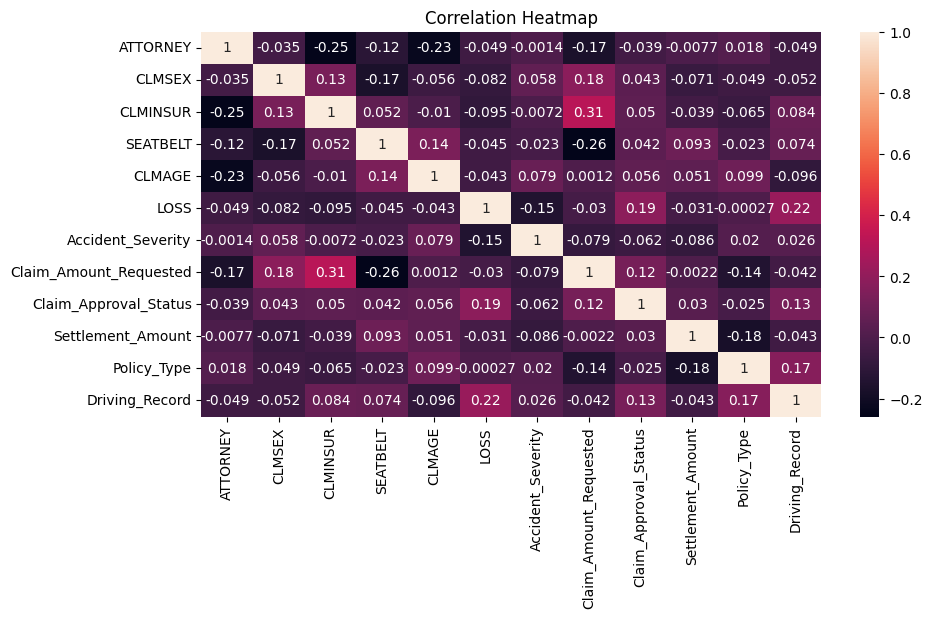

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(insurance.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
scaling=MinMaxScaler()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17                     

In [ ]:
scaling=MinMaxScaler()
insurance['Claim_Amount_Requested']=scaling.fit_transform(insurance[['Claim_Amount_Requested']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                      1   
1                    1                0.174888                     

In [ ]:
scaling=MinMaxScaler()
insurance['Settlement_Amount']=scaling.fit_transform(insurance[['Settlement_Amount']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                      1   
1                    1                0.174888                     

Normalizer Scaling

In [ ]:
scaling=Normalizer()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE  LOSS  Accident_Severity  \
0           1     1.0       1.0       0.0       0   1.0                  1   
1           0     1.0       0.0       1.0      19   1.0                  1   
2           1     0.0       0.0       1.0      69   1.0                  2   
3           1     0.0       0.0       1.0      34   1.0                  1   
4           1     1.0       1.0       0.0       2   1.0                  2   
..        ...     ...       ...       ...     ...   ...                ...   
326         1     0.0       1.0       1.0      35   1.0                  0   
358         1     1.0       0.0       1.0      26   1.0                  2   
365         0     1.0       0.0       1.0      86   1.0                  1   
367         1     0.0       0.0       0.0      91   1.0                  1   
594         0     0.0       0.0       1.0      77   1.0                  0   

     Claim_Amount_Requested  Clai

In [ ]:
scaling=Normalizer()
insurance['Claim_Amount_Requested']=scaling.fit_transform(insurance[['Claim_Amount_Requested']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE  LOSS  Accident_Severity  \
0           1     1.0       1.0       0.0       0   1.0                  1   
1           0     1.0       0.0       1.0      19   1.0                  1   
2           1     0.0       0.0       1.0      69   1.0                  2   
3           1     0.0       0.0       1.0      34   1.0                  1   
4           1     1.0       1.0       0.0       2   1.0                  2   
..        ...     ...       ...       ...     ...   ...                ...   
326         1     0.0       1.0       1.0      35   1.0                  0   
358         1     1.0       0.0       1.0      26   1.0                  2   
365         0     1.0       0.0       1.0      86   1.0                  1   
367         1     0.0       0.0       0.0      91   1.0                  1   
594         0     0.0       0.0       1.0      77   1.0                  0   

     Claim_Amount_Requested  Clai

StandardScaling

In [ ]:
scaling=StandardScaler()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.103142   
1           0     1.0       0.0       1.0      19  0.103142   
2           1     0.0       0.0       1.0      69  0.103142   
3           1     0.0       0.0       1.0      34  0.103142   
4           1     1.0       1.0       0.0       2  0.103142   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.103142   
358         1     1.0       0.0       1.0      26  0.103142   
365         0     1.0       0.0       1.0      86  0.103142   
367         1     0.0       0.0       0.0      91  0.103142   
594         0     0.0       0.0       1.0      77  0.103142   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                     1.0                      1   
1                    1                     1.0                     

In [ ]:
scaling=StandardScaler()
insurance['Claim_Amount_Requested']=scaling.fit_transform(insurance[['Claim_Amount_Requested']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.103142   
1           0     1.0       0.0       1.0      19  0.103142   
2           1     0.0       0.0       1.0      69  0.103142   
3           1     0.0       0.0       1.0      34  0.103142   
4           1     1.0       1.0       0.0       2  0.103142   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.103142   
358         1     1.0       0.0       1.0      26  0.103142   
365         0     1.0       0.0       1.0      86  0.103142   
367         1     0.0       0.0       0.0      91  0.103142   
594         0     0.0       0.0       1.0      77  0.103142   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.103142                      1   
1                    1                0.103142                     

Exploratory Data Analysis (EDA)

In [ ]:
import statsmodels.formula.api as smf

model=smf.ols('ATTORNEY~Policy_Type',data=insurance).fit()

NameError: name 'insurance' is not defined

In [ ]:
model.rsquared,model.rsquared_adj

(np.float64(0.00033862433862374974), np.float64(-0.010410422711498502))

In [ ]:
model=smf.ols('ATTORNEY~Accident_Severity',data=insurance).fit()

model.rsquared,model.rsquared_adj

(np.float64(1.8612823490249397e-06), np.float64(-0.010750806875905239))

In [ ]:
model=smf.ols('ATTORNEY~Driving_Record',data=insurance).fit()

model.rsquared,model.rsquared_adj

(np.float64(0.002438729442115317), np.float64(-0.008287735832700704))

In [ ]:
model=smf.ols('ATTORNEY~LOSS',data=insurance).fit()

model.rsquared,model.rsquared_adj

(np.float64(0.006205673758866048), np.float64(-0.004480286738350436))

In [ ]:
model=smf.ols('ATTORNEY~Claim_Approval_Status',data=insurance).fit()

model.rsquared,model.rsquared_adj

(np.float64(0.0015539639523384219), np.float64(-0.009182014929894455))

In [ ]:
invovlment_rate=insurance.groupby('Policy_Type')['ATTORNEY'].mean()
print(invovlment_rate)

Policy_Type
0    0.622222
1    0.640000
Name: ATTORNEY, dtype: float64


In [ ]:
invovlment_rate=insurance.groupby('Accident_Severity')['ATTORNEY'].mean()
print(invovlment_rate)

Accident_Severity
0    0.666667
1    0.555556
2    0.657895
Name: ATTORNEY, dtype: float64


In [ ]:
invovlment_rate=insurance.groupby('Driving_Record')['ATTORNEY'].mean()
print(invovlment_rate)

Driving_Record
0    0.714286
1    0.583333
2    0.631579
Name: ATTORNEY, dtype: float64


In [ ]:
invovlment_rate=insurance.groupby('SEATBELT')['ATTORNEY'].mean()
print(invovlment_rate)

SEATBELT
0.0    0.702703
1.0    0.586207
Name: ATTORNEY, dtype: float64


In [ ]:
invovlment_rate=insurance.groupby('CLMAGE')['ATTORNEY'].mean()
print(invovlment_rate)

CLMAGE
0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
     ... 
90    0.0
91    1.0
92    1.0
93    0.0
94    0.0
Name: ATTORNEY, Length: 95, dtype: float64


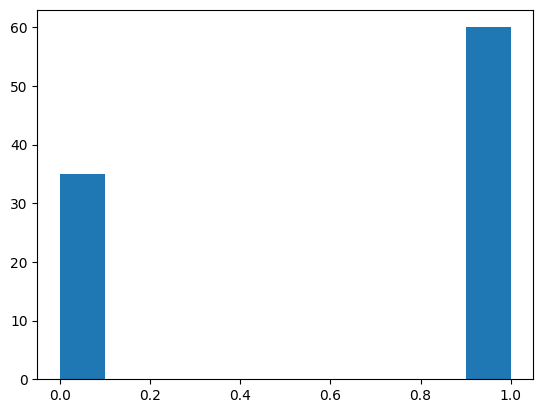

In [ ]:
plt.hist(insurance['ATTORNEY'])
plt.show()

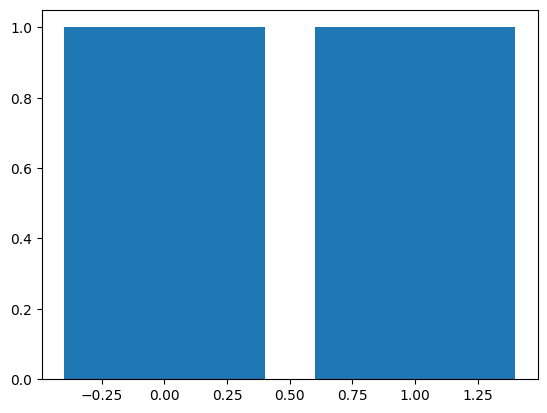

In [ ]:
plt.bar(insurance['Policy_Type'],insurance['ATTORNEY'])
plt.show()

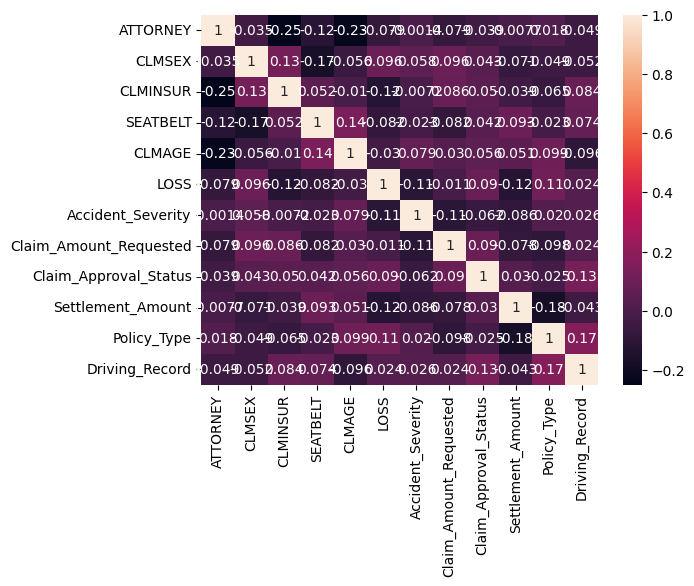

In [ ]:
sns.heatmap(insurance.corr(),annot=True)
plt.show()

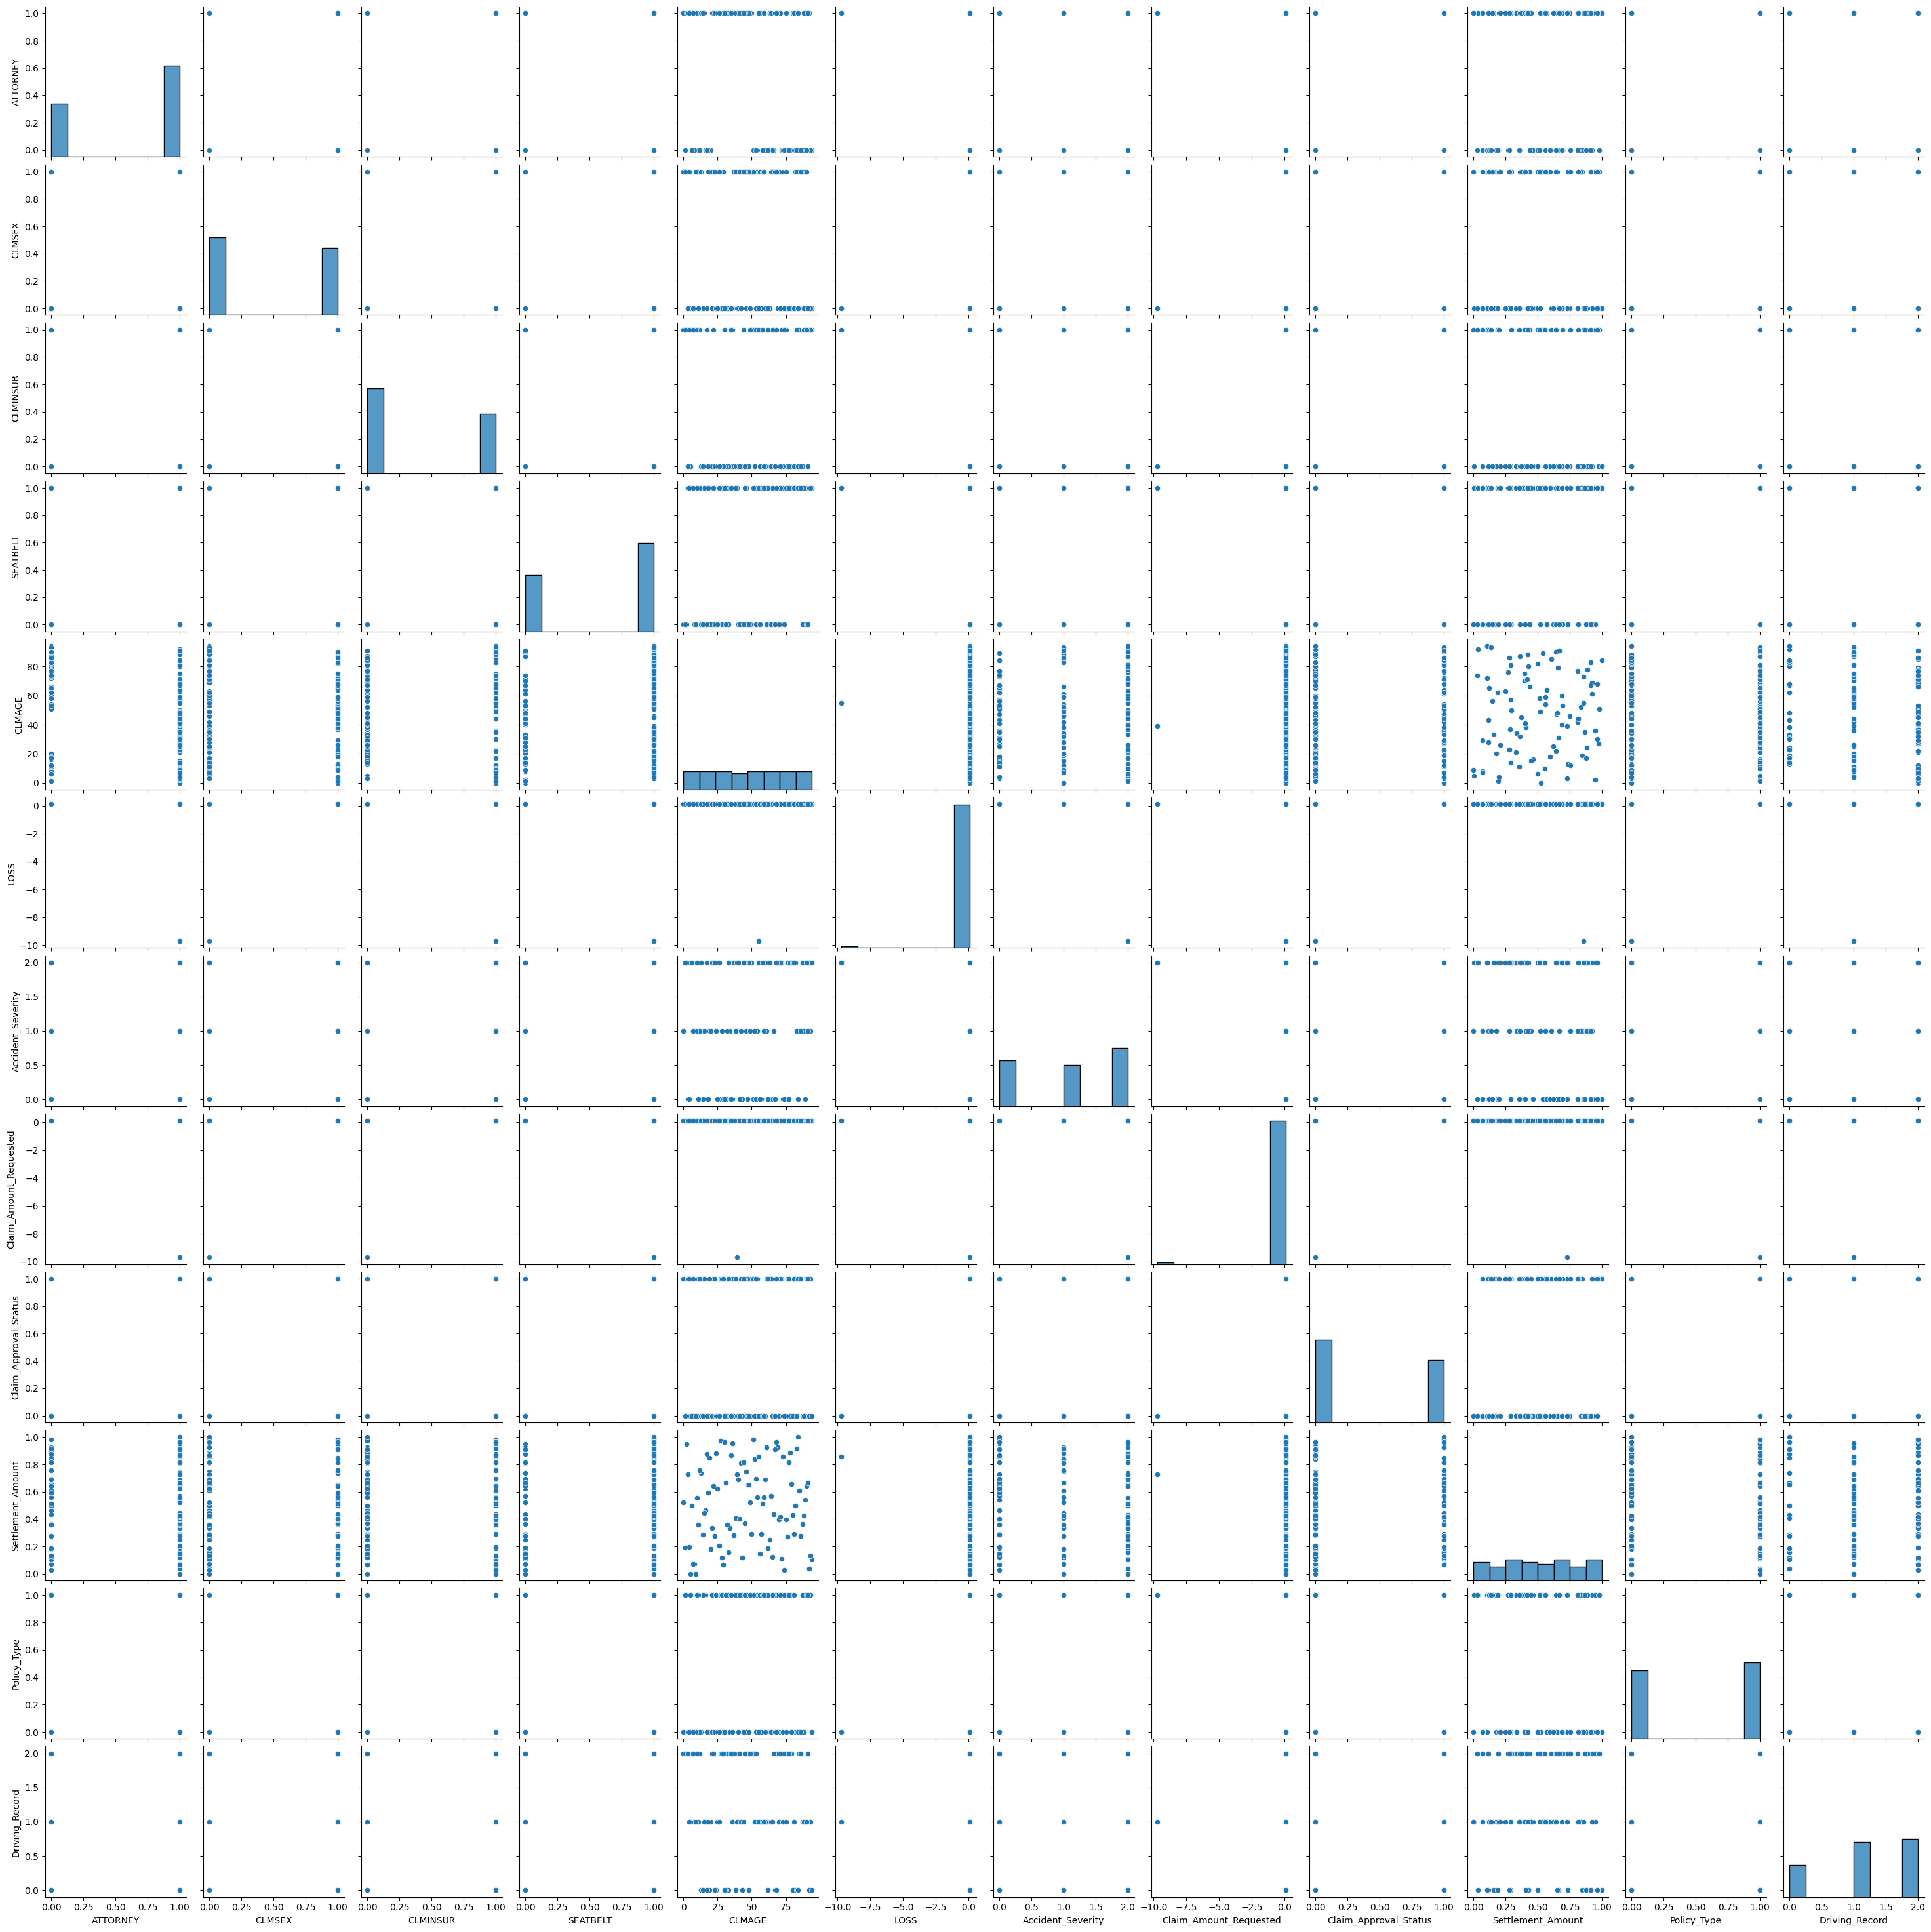

In [ ]:
sns.pairplot(insurance)
plt.show()

MODEL DEVELOPMENT AND EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


x=insurance[['Policy_Type', 'Accident_Severity', 'Driving_Record', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']]
y=insurance['ATTORNEY']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.6842105263157895


In [ ]:
x=insurance[['Policy_Type']]
y=insurance['ATTORNEY']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0.6842105263157895


In [ ]:
x=insurance[['Accident_Severity','Policy_Type','LOSS','Driving_Record','CLMINSUR','SEATBELT']]
y=insurance['ATTORNEY']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1]
0.7368421052631579


USING DecisionTreeClassifier

In [ ]:
x=insurance[['Policy_Type','Accident_Severity']]
y=insurance['ATTORNEY']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1]
0.7894736842105263


SVM

In [ ]:
from sklearn.svm import  SVC

x=insurance[['Policy_Type','Driving_Record','Accident_Severity','LOSS','SEATBELT','CLMAGE']]
y=insurance['ATTORNEY']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(y_pred)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1]
0.7368421052631579


Feature Engineering

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

insurance = pd.read_csv('/content/drive/MyDrive/ML-AD/Claimants_Data.csv')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Accident_Severity' column
insurance['Accident_Severity'] = label_encoder.fit_transform(insurance['Accident_Severity'])

# Identify categorical features
categorical_features = ['Policy_Type','Accident_Severity','CLMSEX','CLMINSUR','SEATBELT','Driving_Record']

# Apply one-hot encoding to categorical features
for feature in categorical_features:
    # Create a OneHotEncoder object with sparse=False to get a dense array
    onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Reshape the column values before fitting the encoder
    encoded_feature = onehot_encoder.fit_transform(insurance[[feature]])

    # Create column names for the encoded features
    encoded_feature_names = [f"{feature}_{val}" for val in onehot_encoder.categories_[0]]

    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(encoded_feature, columns=encoded_feature_names, index=insurance.index)

    # Concatenate the encoded features with the original DataFrame
    insurance = pd.concat([insurance, encoded_df], axis=1)

    # Drop the original categorical feature column
    insurance.drop(columns=[feature], inplace=True)

# Extract the feature and target arrays
# Select all columns except 'CASENUM' and 'ATTORNEY' for X
x = insurance.drop(columns=['CASENUM', 'ATTORNEY'])
y = insurance['ATTORNEY']

model = LogisticRegression(max_iter=500)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(x, y) # Now x contains only numerical values
fit.n_features_
fit.ranking_

array([12, 14, 13,  1, 15,  1,  2,  1,  8,  4,  3,  1,  7, 11, 10,  9,  1,
        6,  5])